In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
 
from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений
plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
%matplotlib inline

# <center> Валидация данных. Методы валидации

In [2]:
water_data = pd.read_csv('data/water_potability.csv')
water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
display(water_data.isnull().mean() * 100)

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [4]:
#Заполняем пропуски
water_data['ph'] = water_data['ph'].fillna(water_data.groupby('Potability')['ph'].transform('median'))
water_data['Sulfate'] = water_data['Sulfate'].fillna(water_data.groupby('Potability')['Sulfate'].transform('median'))
water_data['Trihalomethanes'] = water_data['Trihalomethanes'].fillna(water_data.groupby('Potability')['Trihalomethanes'].transform('median'))

In [5]:
display(water_data.isnull().mean() * 100)

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

In [6]:
X = water_data.drop('Potability', axis=1)
y = water_data['Potability']

## <center> HOLD-OUT

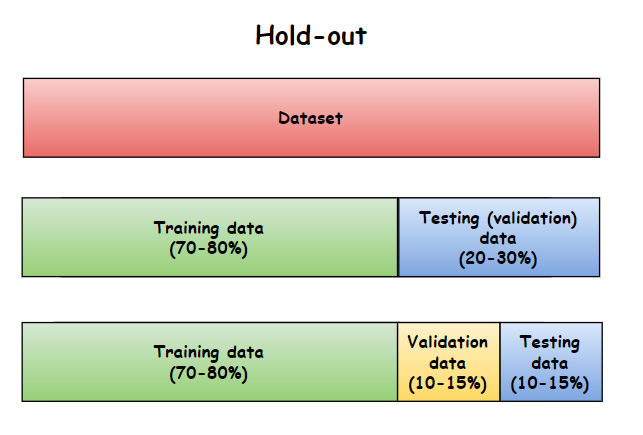

### <center> Реализация метода в sklearn

Метод hold-out реализован в уже знакомой вам функции train_test_split(). Она предназначена для разбиения исходного набора данных случайным образом на две части в заданных соотношениях.

Основные параметры train_test_split():

* arrays — порядковый аргумент с переменным количеством. Набор массивов (это могут быть списки, numpy-массивы, DataFrame), которые подлежат разбиению.
* test_size — размер тестовой (валидационной) выборки. Может быть указан в долях. Если параметр train_size задан дробным числом с плавающей точкой, то параметр test_size определяется автоматически как 1-train_size.
* train_size — размер тренировочной выборки. Может быть указан в долях. Если параметр test_size задан дробным числом с плавающей точкой, то параметр train_size определяется автоматически как 1-test_size.
* random_state — число, на основе которого производится генерация случайных чисел.
* shuffle — параметр, указывающий, стоит ли перемешивать выборку перед разбиением (по умолчанию True).
* stratify — стратифицированное разбиение (о нём мы поговорим в юните по дисбалансу выборки).

In [7]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print('Train shape: {}'.format(X_train.shape))
print('Valid shape: {}'.format(X_valid.shape))
  
## Train shape: (2620, 9)
## Valid shape: (656, 9)

Train shape: (2620, 9)
Valid shape: (656, 9)


In [9]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел  
)
#Обучаем модель на тренировочной выборке
model.fit(X_train, y_train)
#Делаем предсказание для каждой из выборок
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
#Выводим значения метрик
print('Train hold-out accuracy: {:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
print('Valid hold-out accuracy: {:.2f}'.format(metrics.accuracy_score(y_valid, y_valid_pred))) 
 
# Train hold-out accuracy: 0.82
# Valid hold-out accuracy: 0.77

Train hold-out accuracy: 0.82
Valid hold-out accuracy: 0.77


In [10]:
#разбиваем исходную выборку на тренировочную и валидационную в соотношении 80/20
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
#разбиваем валидационную выборку на валидационную и тестовую в соотношении 50/50
X_valid, X_test, y_valid, y_test = model_selection.train_test_split(X_valid, y_valid, test_size=0.5, random_state=42)

In [11]:
print('Train shape: {}'.format(X_train.shape))
print('Valid shape: {}'.format(X_valid.shape))
print('Test shape: {}'.format(X_test.shape))

## Train shape: (2620, 9)
## Valid shape: (328, 9)
## Test shape: (328, 9)

Train shape: (2620, 9)
Valid shape: (328, 9)
Test shape: (328, 9)


## <center> K-FOLD

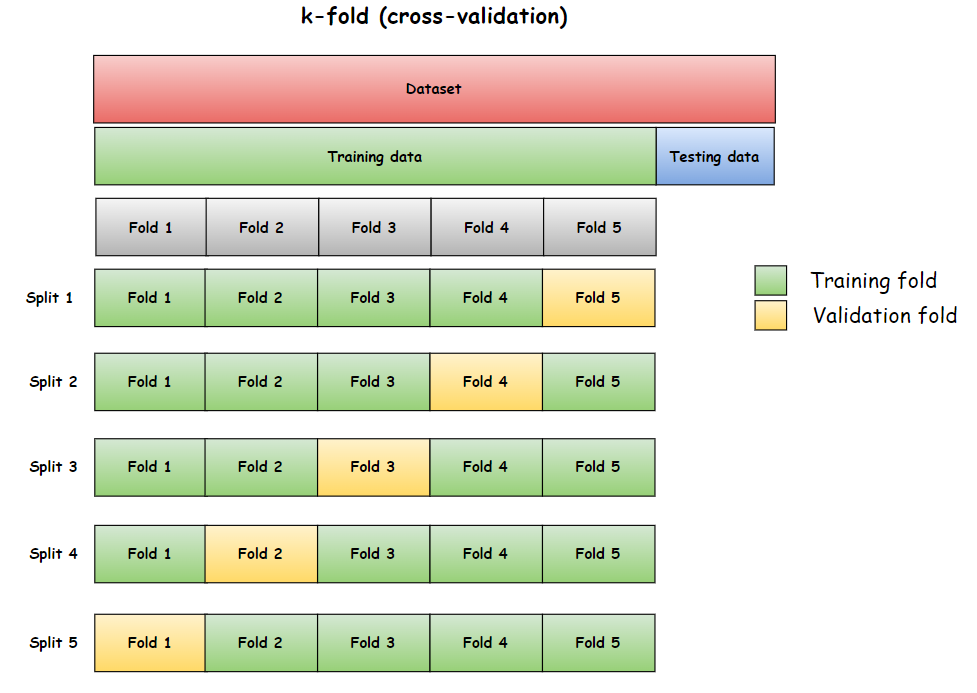

### <center> Реализация метода в sklearn

В библиотеке sklearn метод k-fold реализован в классе KFold.

Основные параметры инициализатора KFold:

* n_split — число фолдов (число  из метода k-fold). По умолчанию — 5.
* shuffle — параметр, указывающий, стоит ли перемешивать исходный набор данных перед разбиением. По умолчанию — False.
* random_state — число, на основе которого производится генерация случайных чисел, если набор данных будет перемешиваться.

In [12]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел  
)
 
#Создаём объект кросс-валидатора KFold
kf = model_selection.KFold(n_splits=5)
#Создаём список для хранения тренировочных и валидационных метрик
train_metrics = []
val_metrics = []
#Организуем цикл для кросс-валидации (используем весь набор данных)
#train_index — индексы тренировочной выборки
#valid_index — индексы валидационной выборки
for train_index, valid_index in kf.split(X, y): 
    #Создаём тренировочную и валидационную выборку, обращаясь по текущим индексам
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_valid, y_valid = X.iloc[valid_index], y.iloc[valid_index]
    #Обучаем дерево решений на тренировочной выборке
    model.fit(X_train, y_train)
    #Делаем предсказание для каждой из выборок
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)
    #Рассчитываем метрику и заносим её в список
    train_metrics.append(metrics.accuracy_score(y_train, y_train_pred))
    val_metrics.append(metrics.accuracy_score(y_valid, y_valid_pred))

In [13]:
print(train_metrics)
print(val_metrics)
 
## [0.8034351145038168, 0.8168637924456315, 0.8027470431133156, 0.8267836703548264, 0.8157191911484166]
## [0.7957317073170732, 0.7053435114503817, 0.7358778625954199, 0.7282442748091603, 0.732824427480916]

[0.8034351145038168, 0.8168637924456315, 0.8027470431133156, 0.8267836703548264, 0.8157191911484166]
[0.7957317073170732, 0.7053435114503817, 0.7358778625954199, 0.7282442748091603, 0.732824427480916]


In [14]:
print('Train k-fold mean accuracy: {:.2f}'.format(np.mean(train_metrics)))
print('Valid k-fold mean accuracy: {:.2f}'.format(np.mean(val_metrics)))
 
## Train k-fold mean accuracy: 0.81
## Valid k-fold mean accuracy: 0.74

Train k-fold mean accuracy: 0.81
Valid k-fold mean accuracy: 0.74


Основные параметры функции cross_validate():

* estimator — модель, качество которой будет проверяться на кросс-валидации.
* X — матрица наблюдений.
* y — вектор-столбец правильных ответов.
* cv — кросс-валидатор из библиотеки sklearn (например, KFold) или количество фолдов, на которые необходимо разбить выборку. По умолчанию используется кросс-валидация на пяти фолдах.
* scoring — название метрики в виде строки либо функция для её вычисления ('accuracy', 'precision', 'recall', 'f1' и другие; полный список — в документации к функции).
* return_train_score — параметр, указывающий стоит ли возвращать значения метрики, полученные на тренировочных фолдах. По умолчанию — False, то есть метрики считаются только на валидационных фолдах.

In [15]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел  
)
 
#Создаём объект кросс-валидатора KFold
kf = model_selection.KFold(n_splits=5)
 
#Считаем метрики на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=model, #модель
    X=X, #матрица наблюдений X
    y=y, #вектор ответов y
    cv=kf, #кросс-валидатор
    scoring='accuracy', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
display(cv_metrics)

{'fit_time': array([0.06577349, 0.03443456, 0.03003263, 0.02954173, 0.02913332]),
 'score_time': array([0.0021019 , 0.00199533, 0.00204802, 0.00199461, 0.00106883]),
 'test_score': array([0.79573171, 0.70534351, 0.73587786, 0.72824427, 0.73282443]),
 'train_score': array([0.80343511, 0.81686379, 0.80274704, 0.82678367, 0.81571919])}

In [16]:
print('Train k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['test_score'])))
 
## Train k-fold mean accuracy: 0.81
## Valid k-fold mean accuracy: 0.74

Train k-fold mean accuracy: 0.81
Valid k-fold mean accuracy: 0.74


## <center> LEAVE-ONE-OUT

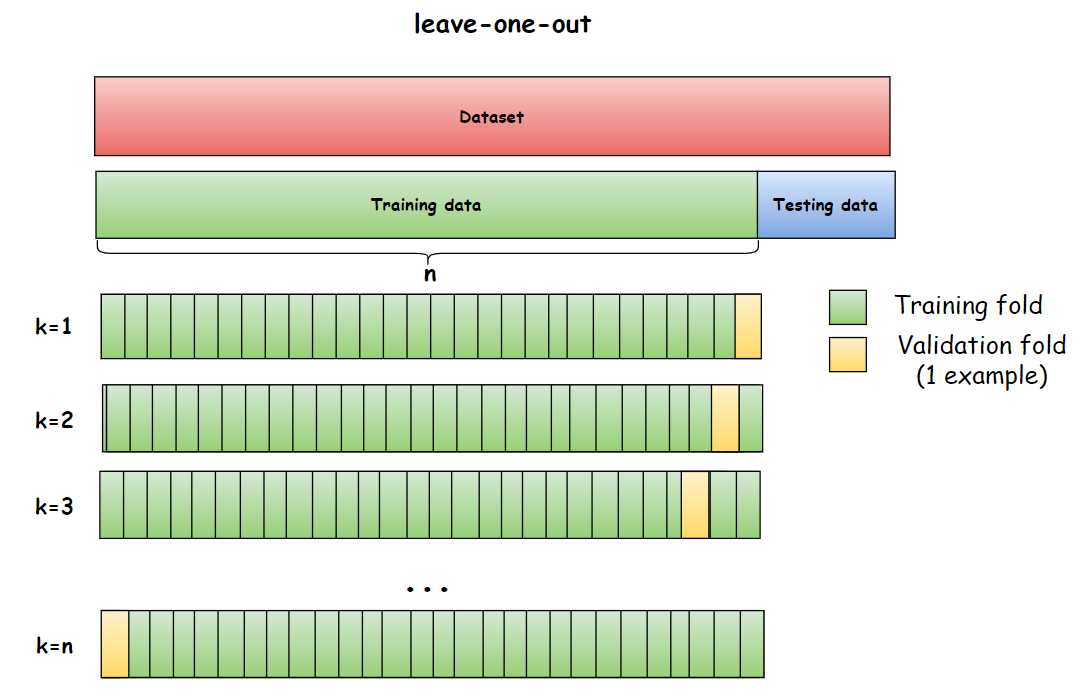

### <center> Реализация метода в sklearn

В библиотеке sklearn метод leave-one-out реализован в классе LeaveOneOut. Параметров инициализации у данного класса нет.

Примечание. Значение метрики будет рассчитано не для всего набора данных, а только для его части. Если вы захотите рассчитать метрику на всём наборе данных, вместо среза передавайте в функцию таблицу X и столбец y целиком. Но имейте в виду, что код в таком случае может выполняться до нескольких минут.

In [17]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел  
)
 
#Создаём кросс-валидатор LeaveOneOut
loo = model_selection.LeaveOneOut()
 
#Считаем метрики на кросс-валидации leave-one-out
cv_metrics = model_selection.cross_validate(
    estimator=model, #модель
    X=X.iloc[:500], #матрица наблюдений X
    y=y.iloc[:500], #вектор ответов y
    cv=loo, #кросс-валидатор
    scoring='accuracy', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
 
print('Train k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['test_score'])))
 
## Train k-fold mean accuracy: 0.95
## Valid k-fold mean accuracy: 0.90

Train k-fold mean accuracy: 0.95
Valid k-fold mean accuracy: 0.90


Примечание. Метод leave-one-out можно реализовать и без использования специального класса — достаточно просто указать параметр n_split=n в инициализаторе KFold, где n — количество строк в таблице.

# <center> Дисбаланс выборки

Рассмотрим влияние дисбаланса на примере датасета о качестве воды. Взглянем на соотношение классов внутри датасета:

Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64

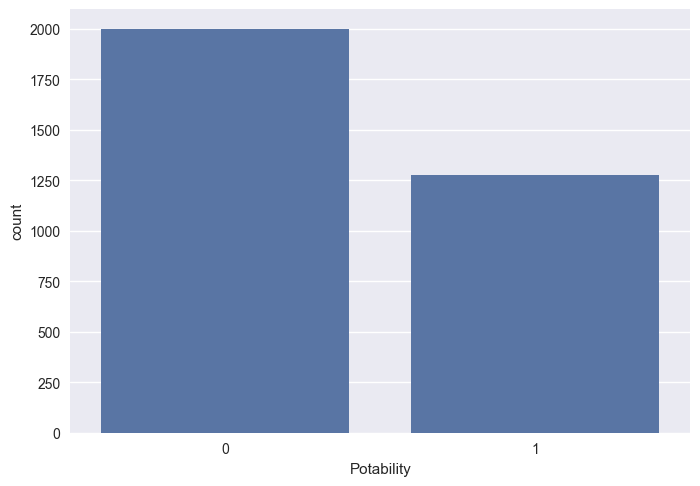

In [18]:
display(water_data['Potability'].value_counts(normalize=True))
sns.countplot(data=water_data, x='Potability');

## <center> СТРАТИФИЦИРОВАННОЕ РАЗБИЕНИЕ

Для того чтобы снизить влияние дисбаланса классов при разбиении выборки, в наборе данных используется специальный тип разбиения, который называется стратифицированным (stratified). Данное разбиение предполагает, что наблюдения, принадлежащие каждому из классов, гарантированно попадут в каждый из наборов данных в одинаковой пропорции.

Давайте на примере рассмотрим, как производить стратифицированное разбиение. Начнём с простого разделения hold-out, которое мы проводим с помощью функции train_test_split(). Для начала проведём обычное случайное разбиение на тренировочную и валидационную выборку (в соотношении 80/20) без стратификации:

In [19]:
X, y = water_data.drop('Potability', axis=1), water_data['Potability']
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)
print('Train:\n', y_train.value_counts(normalize=True), sep='')
print('Valid:\n', y_valid.value_counts(normalize=True), sep='')

Train:
Potability
0    0.620229
1    0.379771
Name: proportion, dtype: float64
Valid:
Potability
0    0.568598
1    0.431402
Name: proportion, dtype: float64


Мы видим, что соотношения классов в тренировочной выборке — 62/38, а в тестовой — 57/43. Давайте попробуем сбалансировать соотношения.

Для стратифицированного разбиения достаточно в функции train_test_split() задать параметр stratify, в который нужно передать столбец с метками классов, на основе которого будет производиться балансировка. Это будет столбец с правильными ответами y.

In [20]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)
print('Train:\n', y_train.value_counts(normalize=True), sep='')
print('Valid:\n', y_valid.value_counts(normalize=True), sep='')

Train:
Potability
0    0.609924
1    0.390076
Name: proportion, dtype: float64
Valid:
Potability
0    0.609756
1    0.390244
Name: proportion, dtype: float64


А что насчёт кросс-валидации? Как организовать разбиение по методу k-fold и получить одинаковые соотношения классов?

Для этого вместо KFold используется кросс-валидатор StratifiedKFold. Принцип работы с ним аналогичен, только, в отличие от KFold, StratifiedKFold будет разбивать выборку на части таким образом, чтобы в тренировочных и валидационных фолдах соотношения классов были приблизительно одинаковыми.

Давайте напишем код, который организует стратифицированное k-fold-разбиение на три фолда, и выведем соотношения классов в каждой из выборок:

In [21]:
skf = model_selection.StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
for train_index, valid_index in skf.split(X, y): 
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_valid, y_valid = X.iloc[valid_index], y.iloc[valid_index]
    print('Train:\n', y_train.value_counts(normalize=True), sep='')
    print('Valid:\n', y_valid.value_counts(normalize=True), sep='')
    print('-'*40)

Train:
Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64
Valid:
Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64
----------------------------------------
Train:
Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64
Valid:
Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64
----------------------------------------
Train:
Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64
Valid:
Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64
----------------------------------------


### Задание 3.3

Ниже представлен код для генерации задачи классификации и отрисовки диаграммы рассеяния с цветовой группировкой по классам:

In [22]:
# from sklearn import datasets
# X, y = datasets.make_classification(
#     n_samples=200, #количество объектов
#     n_features=2, #количество признаков
#     n_informative=2, #количество информативных признаков
#     n_redundant=0, #количество неинформативных признаков
#     n_classes=2, #количество классов
#     weights=[1, 0.2], #пропорции классов
#     random_state=40 #генератор случайных чисел
# )
# X = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
# y = pd.Series(y)
# sns.scatterplot(x=X['feature_1'], y=X['feature_2'], hue=y);

Разбейте исходный набор данных на тренировочный и валидационный со стратификацией по классам в соотношении 80/20. В качестве значения параметра random_state возьмите число 42.

Постройте диаграммы рассеяния с цветовой группировкой по классам для валидационной выборки.

In [23]:
# from sklearn import datasets

# X, y = datasets.make_classification(
#     n_samples=200, #количество объектов
#     n_features=2, #количество признаков
#     n_informative=2, #количество информативных признаков
#     n_redundant=0, #количество неинформативных признаков
#     n_classes=2, #количество классов
#     weights=[1, 0.2], #пропорции классов
#     random_state=40 #генератор случайных чисел
# )

# X = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
# y = pd.Series(y)

# # Разделение на тренировочную и валидационную выборки
# X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
#     X, y, 
#     stratify=y, 
#     test_size=0.2, 
#     random_state=42
# )

# sns.scatterplot(x=X_valid['feature_1'], y=X_valid['feature_2'], hue=y);

## <center> ВЫБОР МЕТРИК В УСЛОВИЯХ ДИСБАЛАНСА КЛАССОВ

In [24]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    random_state=42, #генератор случайных чисел
)
#Обучаем модель на тренировочной выборке
model.fit(X_train, y_train)
#Делаем предсказание для каждой из выборок
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
#Выводим значения метрик
print(metrics.classification_report(y_valid, y_valid_pred)) 

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       400
           1       0.81      0.55      0.65       256

    accuracy                           0.77       656
   macro avg       0.78      0.73      0.74       656
weighted avg       0.78      0.77      0.76       656



### Задание 3.5

Для выполнения этого задания используйте сгенерированные тренировочную и валидационную выборки из задания 3.3.

Обучите модель логистической регрессии на тренировочной выборке (все параметры оставьте по умолчанию).

Сделайте предсказание для валидационной выборки и рассчитайте метрики классификации.

In [25]:
# from sklearn import datasets
# X, y = datasets.make_classification(
#     n_samples=200, #количество объектов
#     n_features=2, #количество признаков
#     n_informative=2, #количество информативных признаков
#     n_redundant=0, #количество неинформативных признаков
#     n_classes=2, #количество классов
#     weights=[1, 0.2], #пропорции классов
#     random_state=40 #генератор случайных чисел
# )

# X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
# #Создаём модель
# log_reg = linear_model.LogisticRegression()
# #Обучаем модель на тренировочной выборке
# log_reg.fit(X_train, y_train)
# #Делаем предсказание для каждой из выборок
# y_valid_pred = log_reg.predict(X_valid)
# #Выводим значения метрик
# print(metrics.classification_report(y_valid, y_valid_pred)) 

In [26]:
# # 2. Разделение данных (если нужно)
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=40)

# # 3. Обучение модели
# log_reg_balanced = linear_model.LogisticRegression(class_weight='balanced')
# log_reg_balanced.fit(X_train, y_train)

# # 4. Функция визуализации (исправленная)
# def plot_probabilities_2d(X, y, model):
#     # Для numpy array используем X[:, 0] вместо X.iloc[:, 0]
#     xx1, xx2 = np.meshgrid(
#         np.arange(X[:, 0].min()-1, X[:, 0].max()+1, 0.1),
#         np.arange(X[:, 1].min()-1, X[:, 1].max()+1, 0.1)
#     )
    
#     X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
#     probs = model.predict_proba(X_net)[:, 1]
#     probs = probs.reshape(xx1.shape)
    
#     fig, ax = plt.subplots(figsize=(10, 5))
#     contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
#     bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black')
#     fig.colorbar(contour)
    
#     # Для numpy array используем X[:, 0] вместо X.iloc[:, 0]
#     sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='seismic', ax=ax)
#     ax.set_title('Scatter Plot with Decision Boundary')
#     ax.legend(bbox_to_anchor=(-0.05, 1))
#     plt.show()

# # 5. Вызов функции с правильным именем модели
# plot_probabilities_2d(X, y, log_reg)

## <center> ПОСТРОЕНИЕ МОДЕЛИ В УСЛОВИЯХ ДИСБАЛАНСА КЛАССОВ

#### <center> ВЗВЕШИВАНИЕ ОБЪЕКТОВ

In [27]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    random_state=42, #генератор случайных чисел
    class_weight='balanced' #веса классов
)
#Обучаем модель на тренировочной выборке
model.fit(X_train, y_train)
#Делаем предсказание для каждой из выборок
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
#Выводим значения метрик    
print(metrics.classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       400
           1       0.63      0.76      0.69       256

    accuracy                           0.73       656
   macro avg       0.72      0.73      0.72       656
weighted avg       0.74      0.73      0.73       656



### Задание 3.7

Для выполнения этого задания используйте сгенерированные тренировочную и валидационную выборки из задания 3.3.

Обучите модель логистической регрессии на тренировочной выборке, установив сбалансированные веса для классов.

Сделайте предсказание для валидационной выборки и рассчитайте метрики классификации.

In [28]:
# from sklearn import datasets
# X, y = datasets.make_classification(
#     n_samples=200, #количество объектов
#     n_features=2, #количество признаков
#     n_informative=2, #количество информативных признаков
#     n_redundant=0, #количество неинформативных признаков
#     n_classes=2, #количество классов
#     weights=[1, 0.2], #пропорции классов
#     random_state=40 #генератор случайных чисел
# )

# #Создаём модель
# log_reg_balanced = linear_model.LogisticRegression(class_weight='balanced') #веса классов 
# #Обучаем модель на тренировочной выборке
# log_reg_balanced.fit(X_train, y_train)
# #Делаем предсказание для каждой из выборок
# y_valid_pred = log_reg_balanced.predict(X_valid)
# #Выводим значения метрик    
# print(metrics.classification_report(y_valid, y_valid_pred))

In [29]:
# # 2. Разделение данных (если нужно)
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=40)

# # 3. Обучение модели
# log_reg_balanced = linear_model.LogisticRegression(class_weight='balanced')
# log_reg_balanced.fit(X_train, y_train)

# # 4. Функция визуализации (исправленная)
# def plot_probabilities_2d(X, y, model):
#     # Для numpy array используем X[:, 0] вместо X.iloc[:, 0]
#     xx1, xx2 = np.meshgrid(
#         np.arange(X[:, 0].min()-1, X[:, 0].max()+1, 0.1),
#         np.arange(X[:, 1].min()-1, X[:, 1].max()+1, 0.1)
#     )
    
#     X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
#     probs = model.predict_proba(X_net)[:, 1]
#     probs = probs.reshape(xx1.shape)
    
#     fig, ax = plt.subplots(figsize=(10, 5))
#     contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
#     bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black')
#     fig.colorbar(contour)
    
#     # Для numpy array используем X[:, 0] вместо X.iloc[:, 0]
#     sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='seismic', ax=ax)
#     ax.set_title('Scatter Plot with Decision Boundary')
#     ax.legend(bbox_to_anchor=(-0.05, 1))
#     plt.show()

# # 5. Вызов функции с правильным именем модели
# plot_probabilities_2d(X, y, log_reg_balanced)

### <center> ВЫБОР ПОРОГА ВЕРОЯТНОСТИ. PR-КРИВАЯ

In [30]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел 
)
#Обучаем модель
model.fit(X_train, y_train)
#Создаём кросс-валидатор k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
#Делаем предсказание вероятностей на кросс-валидации
y_cv_proba_pred = model_selection.cross_val_predict(model, X_train, y_train, cv=skf, method='predict_proba')

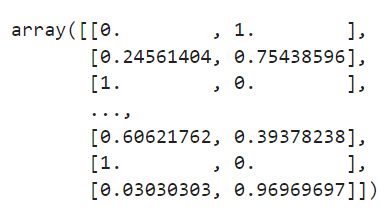

In [31]:
#Выделяем столбец с вероятностями для класса 1 
y_cv_proba_pred = y_cv_proba_pred[:, 1]

In [32]:
#Вычисляем координаты PR-кривой
precision, recall, thresholds = metrics.precision_recall_curve(y_train, y_cv_proba_pred)

print('Thresholds:', thresholds[:5])
print('Precision scores:', precision[:5])
print('Recall scores:',recall[:5])

Thresholds: [0.         0.02739726 0.02898551 0.05       0.07407407]
Precision scores: [0.39007634 0.50050659 0.50357873 0.50437919 0.5043837 ]
Recall scores: [1.         0.9667319  0.96379648 0.95792564 0.95694716]


Best threshold = 0.33, F1-Score = 0.69


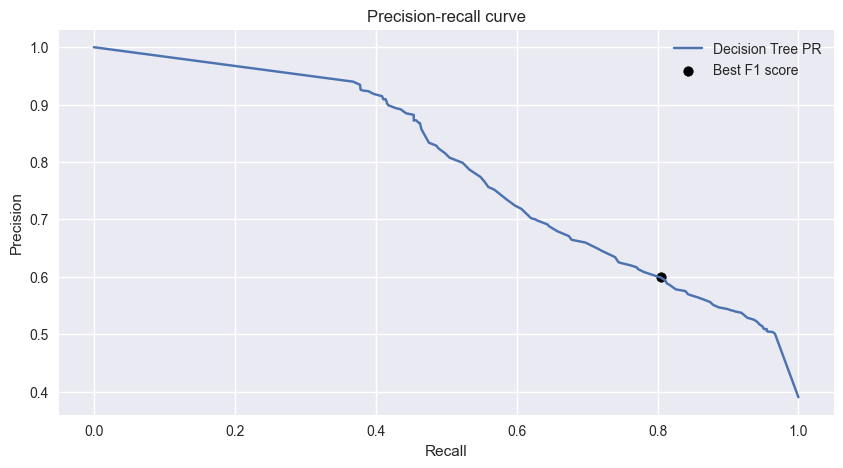

In [33]:
#Вычисляем F1-меру при различных threshold
f1_scores = (2 * precision * recall) / (precision + recall)
#Определяем индекс максимума
idx = np.argmax(f1_scores)
print('Best threshold = {:.2f}, F1-Score = {:.2f}'.format(thresholds[idx], f1_scores[idx]))

#Строим PR-кривую
fig, ax = plt.subplots(figsize=(10, 5)) #фигура + координатная плоскость
#Строим линейный график зависимости precision от recall
ax.plot(recall, precision, label='Decision Tree PR')
#Отмечаем точку максимума F1
ax.scatter(recall[idx], precision[idx], marker='o', color='black', label='Best F1 score')
#Даем графику название и подписи осям
ax.set_title('Precision-recall curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
#Отображаем легенду
ax.legend();

In [34]:
#Задаём оптимальный порог вероятностей
threshold_opt = 0.33
#Образцы воды, для которых вероятность быть пригодными для питья > threshold_opt, относим к классу 1
#В противном случае — к классу 0
y_valid_pred_proba = model.predict_proba(X_valid)[:, 1]
y_valid_pred = (y_valid_pred_proba > threshold_opt).astype('int')
#Считаем метрики
print(metrics.classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.82      0.70      0.76       400
           1       0.62      0.76      0.68       256

    accuracy                           0.73       656
   macro avg       0.72      0.73      0.72       656
weighted avg       0.74      0.73      0.73       656



In [35]:
print('PR AUC: {:.2f}'.format(metrics.auc(recall, precision)))
# PR AUC: 0.79

PR AUC: 0.79


### <center> СЭМПЛИРОВАНИЕ

In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
sm = SMOTE(random_state=2)
X_train_s, y_train_s = sm.fit_resample(X_train, y_train)

print('Train shape before oversampling:', X_train.shape) 
print('Class balance before oversampling: \n', y_train.value_counts(), sep='')
print('-'*40)
print('Train shape after oversampling:', X_train_s.shape)
print('Class balance after oversampling: \n', y_train_s.value_counts(), sep='')

Train shape before oversampling: (2620, 9)
Class balance before oversampling: 
Potability
0    1598
1    1022
Name: count, dtype: int64
----------------------------------------
Train shape after oversampling: (3196, 9)
Class balance after oversampling: 
Potability
0    1598
1    1598
Name: count, dtype: int64


In [38]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    random_state=42, #генератор случайных чисел
)
#Обучаем модель на тренировочной выборке (с сэмплированием)
model.fit(X_train_s, y_train_s)
#Делаем предсказание для каждой из выборок
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
#Выводим значения метрик    
print(metrics.classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76       400
           1       0.63      0.78      0.69       256

    accuracy                           0.73       656
   macro avg       0.73      0.74      0.73       656
weighted avg       0.75      0.73      0.73       656



### Задание 3.11

Для выполнения этого задания используйте сгенерированные тренировочную и валидационную выборки из задания 3.3.

Сбалансируйте тренировочную выборку с помощью алгоритма SMOTE. В качестве значения параметра random_state возьмите число 42, остальные параметры оставьте по умолчанию.

Обучите модель логистической регрессии на пересэмплированной тренировочной выборке. Все параметры оставьте по умолчанию.

Сделайте предсказание для валидационной выборки и рассчитайте метрики классификации.

In [39]:
# from sklearn import datasets
# X, y = datasets.make_classification(
#     n_samples=200, #количество объектов
#     n_features=2, #количество признаков
#     n_informative=2, #количество информативных признаков
#     n_redundant=0, #количество неинформативных признаков
#     n_classes=2, #количество классов
#     weights=[1, 0.2], #пропорции классов
#     random_state=40 #генератор случайных чисел
# )
# X = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
# y = pd.Series(y)

# X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# sm_log = SMOTE(random_state=2)
# X_train_log, y_train_log = sm_log.fit_resample(X_train, y_train)

# #Создаём модель
# log_reg_smote = linear_model.LogisticRegression(class_weight='balanced') #генератор случайных чисел
# #Обучаем модель на тренировочной выборке (с сэмплированием)
# log_reg_smote.fit(X_train_log, y_train_log)
# #Делаем предсказание для каждой из выборок
# y_valid_pred = log_reg_smote.predict(X_valid)
# #Выводим значения метрик    
# print(metrics.classification_report(y_valid, y_valid_pred))


In [40]:
# def plot_probabilities_2d(X, y, model):
#     #Генерируем координатную сетку из всех возможных значений для признаков
#     #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
#     xx1, xx2 = np.meshgrid(
#         np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
#         np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
#     )
#     #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
#     #Объединяем два столбца в таблицу с помощью hstack
#     X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    
#     #Предсказываем вероятность для всех точек на координатной сетке
#     #Нам нужна только вероятность класса 1
#     probs = model.predict_proba(X_net)[:, 1]
    
#     #Переводим столбец из вероятностей в размер координатной сетки
#     probs = probs.reshape(xx1.shape)
    
#     #Создаём фигуру и координатную плоскость
#     fig, ax = plt.subplots(figsize = (10, 5))
    
#     #Рисуем тепловую карту вероятностей
#     contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    
#     #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
#     bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    
#     #Добавляем цветовую панель 
#     colorbar = fig.colorbar(contour)
    
#     #Накладываем поверх тепловой карты диаграмму рассеяния
#     sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    
#     #Даём графику название
#     ax.set_title('Scatter Plot with Decision Boundary');
    
#     #Смещаем легенду в верхний левый угол вне графика
#     ax.legend(bbox_to_anchor=(-0.05, 1))
    
# plot_probabilities_2d(X, y, log_reg_smote)

# <center> Недообучение и переобучение. Утечка данных

## <center> КАК ОБНАРУЖИТЬ ПЕРЕОБУЧЕНИЕ

Основные способы отследить переобучение:

hold-out-разбиение,\
k-fold-валидация и leave-one-out-валидация,\
кривые обучения (learning curves).

In [41]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
#Создаём модель
model_bad = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    class_weight='balanced', #веса классов
    random_state=42 #генератор случайных чисел
)
#Обучаем модель на тренировочной выборке
model_bad.fit(X_train, y_train)
#Делаем предсказание для каждой из выборок
y_train_pred = model_bad.predict(X_train)
y_valid_pred = model_bad.predict(X_valid)
#Выводим значения метрик для тренировочной выборки
print('Train F1 score: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
#Выводим значения метрик для валидационной выборки
print('Valid F1 score: {:.2f}'.format(metrics.f1_score(y_valid, y_valid_pred)))
 
# Train F1 score: 1.00
# Valid F1 score: 0.67

Train F1 score: 1.00
Valid F1 score: 0.67


In [42]:
#Создаём объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
 
#Считаем метрики на кросс-валидации k-fold со стратификацией
cv_metrics = model_selection.cross_validate(
    estimator=model_bad, #модель
    X=X, #матрица наблюдений X
    y=y, #вектор ответов y
    cv=skf, #кросс-валидатор
    scoring='f1', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
display(cv_metrics)

{'fit_time': array([0.05105734, 0.03943205, 0.04284525, 0.03886104, 0.04060531]),
 'score_time': array([0.00301433, 0.00212717, 0.00211501, 0.00299358, 0.00326157]),
 'test_score': array([0.61445783, 0.68421053, 0.62332696, 0.63276836, 0.70119522]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [43]:
print('Train k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['test_score'])))
## Train k-fold mean f1: 1.00
## Valid k-fold mean f1: 0.65

Train k-fold mean f1: 1.00
Valid k-fold mean f1: 0.65


### Задание 4.3

In [44]:
# from sklearn import datasets
# X, y = datasets.make_classification(
#     n_samples=1000, #количество объектов
#     n_features=2, #количество признаков
#     n_informative=2, #количество информативных признаков
#     n_redundant=0, #количество неинформативных признаков
#     n_classes=2, #количество классов
#     n_clusters_per_class=2, #количество кластеров внутри класса
#     random_state=1 #генератор случайных чисел
# )
# X = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
# y = pd.Series(y)
# sns.scatterplot(x=X['feature_1'], y=X['feature_2'], hue=y, palette='seismic');

Разделите исходный набор данных на тренировочную и валидационную выборки в соотношении 70/30, используя функцию train_test_split(). В качестве значения параметра random_state возьмите число 42.

Обучите модель дерева решений с глубиной 10 (остальные параметры оставьте по умолчанию) для решения задачи классификации на тренировочной выборке. Сделайте предсказания для тренировочной и валидационной выборок и рассчитайте метрику accuracy.

В качестве ответа укажите значение метрики accuracy на тренировочной и валидационной выборках. Ответ округлите до двух знаков после точки-разделителя.

In [45]:
# X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)
# #Создаём модель
# model_03 = tree.DecisionTreeClassifier(max_depth=10)
# #Обучаем модель на тренировочной выборке
# model_03.fit(X_train, y_train)
# #Делаем предсказание для каждой из выборок
# y_train_pred = model_03.predict(X_train)
# y_valid_pred = model_03.predict(X_valid)
# #Выводим значения метрик для тренировочной выборки
# print('Train F1 score: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
# #Выводим значения метрик для валидационной выборки
# print('Valid F1 score: {:.2f}'.format(metrics.f1_score(y_valid, y_valid_pred)))

In [46]:
# def plot_probabilities_2d(X, y, model):
#     #Генерируем координатную сетку из всех возможных значений для признаков
#     #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
#     xx1, xx2 = np.meshgrid(
#         np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
#         np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
#     )
#     #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
#     #Объединяем два столбца в таблицу с помощью hstack
#     X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    
#     #Предсказываем вероятность для всех точек на координатной сетке
#     #Нам нужна только вероятность класса 1
#     probs = model.predict_proba(X_net)[:, 1]
    
#     #Переводим столбец из вероятностей в размер координатной сетки
#     probs = probs.reshape(xx1.shape)
    
#     #Создаём фигуру и координатную плоскость
#     fig, ax = plt.subplots(figsize = (10, 5))
    
#     #Рисуем тепловую карту вероятностей
#     contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    
#     #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
#     bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    
#     #Добавляем цветовую панель 
#     colorbar = fig.colorbar(contour)
    
#     #Накладываем поверх тепловой карты диаграмму рассеяния
#     sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    
#     #Даём графику название
#     ax.set_title('Scatter Plot with Decision Boundary');
    
#     #Смещаем легенду в верхний левый угол вне графика
#     ax.legend(bbox_to_anchor=(-0.05, 1))
    
# plot_probabilities_2d(X, y, model_03)

## <center> МЕТОДЫ БОРЬБЫ С ПЕРЕОБУЧЕНИЕМ

In [47]:
print('Current depth:', model_bad.get_depth())
## Current depth: 27

Current depth: 27


In [48]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #ограничиваем глубину дерева
    random_state=42, #генератор случайных чисел
    class_weight='balanced' #веса классов
)
 
#Создаём объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
 
#Считаем метрики на кросс-валидации k-fold со стратификацией
cv_metrics = model_selection.cross_validate(
    estimator=model, #модель
    X=X, #матрица наблюдений X
    y=y, #вектор ответов y
    cv=skf, #кросс-валидатор
    scoring='f1', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
 
print('Train k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['test_score'])))


## Train k-fold mean f1: 0.75
## Valid k-fold mean f1: 0.66

Train k-fold mean f1: 0.75
Valid k-fold mean f1: 0.66


In [49]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #ограничиваем глубину дерева
    min_samples_leaf=5, #увеличиваем количество объектов в листе
    random_state=42, #генератор случайных чисел
    class_weight='balanced' #веса классов
)
 
#Создаём объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
 
#Считаем метрики на кросс-валидации k-fold со стратификацией
cv_metrics = model_selection.cross_validate(
    estimator=model, #модель
    X=X, #матрица наблюдений X
    y=y, #вектор ответов y
    cv=skf, #кросс-валидатор
    scoring='f1', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
 
print('Train k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['test_score'])))
## Train k-fold mean f1: 0.74
## Valid k-fold mean f1: 0.66

Train k-fold mean f1: 0.74
Valid k-fold mean f1: 0.66


### Задание 4.6

Для выполнения этого задания используйте сгенерированные тренировочную и валидационную выборки из задания 4.3.\
Обучите модель дерева решений с глубиной 3 (остальные параметры оставьте по умолчанию) для решения задачи классификации на тренировочной выборке.\
Сделайте предсказания для тренировочной и валидационной выборок и рассчитайте метрику accuracy.\
В качестве ответа укажите значение метрики accuracy на тренировочной и валидационной выборках.

In [50]:
# from sklearn import datasets
# X, y = datasets.make_classification(
#     n_samples=1000, #количество объектов
#     n_features=2, #количество признаков
#     n_informative=2, #количество информативных признаков
#     n_redundant=0, #количество неинформативных признаков
#     n_classes=2, #количество классов
#     n_clusters_per_class=2, #количество кластеров внутри класса
#     random_state=1 #генератор случайных чисел
# )
# X = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
# y = pd.Series(y)
 
# X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)
# #Создаём модель
# model_val = tree.DecisionTreeClassifier(max_depth=3)
# #Обучаем модель на тренировочной выборке
# model_val.fit(X_train, y_train)
# #Делаем предсказание для каждой из выборок
# y_train_pred = model_val.predict(X_train)
# y_valid_pred = model_val.predict(X_valid)
# #Выводим значения метрик для тренировочной выборки
# print('Train F1 score: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
# #Выводим значения метрик для валидационной выборки
# print('Valid F1 score: {:.2f}'.format(metrics.f1_score(y_valid, y_valid_pred)))


In [51]:
# def plot_probabilities_2d(X, y, model):
#     #Генерируем координатную сетку из всех возможных значений для признаков
#     #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
#     xx1, xx2 = np.meshgrid(
#         np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
#         np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
#     )
#     #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
#     #Объединяем два столбца в таблицу с помощью hstack
#     X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    
#     #Предсказываем вероятность для всех точек на координатной сетке
#     #Нам нужна только вероятность класса 1
#     probs = model.predict_proba(X_net)[:, 1]
    
#     #Переводим столбец из вероятностей в размер координатной сетки
#     probs = probs.reshape(xx1.shape)
    
#     #Создаём фигуру и координатную плоскость
#     fig, ax = plt.subplots(figsize = (10, 5))
    
#     #Рисуем тепловую карту вероятностей
#     contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    
#     #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
#     bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    
#     #Добавляем цветовую панель 
#     colorbar = fig.colorbar(contour)
    
#     #Накладываем поверх тепловой карты диаграмму рассеяния
#     sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    
#     #Даём графику название
#     ax.set_title('Scatter Plot with Decision Boundary');
    
#     #Смещаем легенду в верхний левый угол вне графика
#     ax.legend(bbox_to_anchor=(-0.05, 1))
    
# plot_probabilities_2d(X, y, model_val)

## <center> УТЕЧКА ДАННЫХ

Как обнаружить утечку данных

* Читайте описание признаков.

Из описания признаков всегда можно узнать полезную информацию и обнаружить утечку с помощью банальной логики. Если вы предсказываете цену товара, а в вашем наборе данных есть признак цены этого товара со скидкой, очевидно, что данный признак стоит удалить из обучающего набора данных.

* Проверяйте корреляции с целевым признаком.

В процессе разведывательного анализа вы можете обнаружить признаки, которые очень сильно коррелируют с целевой переменной. Конечно, такая корреляция может быть естественной и не сопровождаться утечкой, например корреляция между количеством комнат в квартире и её ценой. Однако высокая степень корреляции между налоговой выплатой за продажу и ценой квартиры — это яркий пример утечки.

* Относитесь скептически к подозрительно высокому качеству моделей.

При построении модели вас может насторожить слишком высокое качество даже самых простых моделей, которого в реальных условиях достичь не удалось бы. Это может быть сигналом о наличии утечки данных.

Поэтому для начала старайтесь строить baseline — простые модели машинного обучения, такие как логистическая регрессия.

# <center> Кривая обучения

## <center> ИДЕЯ КРИВОЙ ОБУЧЕНИЯ

Кривая обучения (learning curve) — это график зависимости некоторой метрики на обучающем (валидационном) наборе данных от количества объектов, которые участвуют в обучении модели.

## <center> ПОСТРОЕНИЕ КРИВОЙ ОБУЧЕНИЯ

Основные параметры функции learning_curve():

estimator — модель, качество которой будет проверяться на кросс-валидации.

X — матрица наблюдений.

y — вектор-столбец правильных ответов.

train_sizes — относительное (долевое) или абсолютное количество обучающих примеров, которые будут использоваться для создания кривой обучения. Если dtype имеет значение float, он рассматривается как часть максимального размера обучающего набора (который определяется выбранным методом проверки), т. е. он должен быть в пределах (0, 1].

По умолчанию используется список [0.1, 0.325, 0.55, 0.775, 1.0], то есть для построения кривой обучения используется пять точек. Первая точка кривой обучения строится по 10 % наблюдений из обучающего набора, вторая точка — по 32.5 % и так далее до тех пор, пока в построении модели не будет участвовать весь обучающий набор данных.

cv — кросс-валидатор из библиотеки sklearn (например, KFold) или количество фолдов, на которые необходимо разбить выборку. По умолчанию используется кросс-валидация k-fold на пяти фолдах.

scoring — название метрики в виде строки либо функция для её вычисления.

In [52]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    class_weight='balanced', 
    random_state=42, #генератор случайных чисел 
)
 
#Создаём объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
 
#Вычисляем координаты для построения кривой обучения
train_sizes, train_scores, valid_scores = model_selection.learning_curve(
    estimator = model, #модель
    X = X, #матрица наблюдений X
    y = y, #вектор ответов y
    cv = skf, #кросс-валидатор
    scoring = 'f1' #метрика
)
print('Train sizes: \n', train_sizes)
print('Train scores: \n', train_scores)
print('Valid scores: \n', valid_scores)

Train sizes: 
 [ 262  851 1441 2030 2620]
Train scores: 
 [[0.8        0.72727273 0.72727273 0.72727273 0.72727273]
 [0.76156584 0.82522523 0.8757764  0.8757764  0.8757764 ]
 [0.78546099 0.80108011 0.78497653 0.78183613 0.78183613]
 [0.75440806 0.74526573 0.72822528 0.76443265 0.75997384]
 [0.73336393 0.75992939 0.72322275 0.74051593 0.76085963]]
Valid scores: 
 [[0.62222222 0.2228739  0.18128655 0.25329815 0.28486647]
 [0.64528302 0.4978903  0.46031746 0.53831776 0.56928839]
 [0.59622642 0.60687023 0.60805861 0.56624319 0.60820896]
 [0.60903733 0.68641115 0.63859649 0.59344894 0.67407407]
 [0.61981982 0.6797153  0.66294227 0.61689587 0.71719039]]


In [53]:
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
 
print('Train k-fold f1 scores',  train_scores_mean)
print('Valid k-fold f1 scores',  valid_scores_mean)
 
## Train k-fold f1 scores [0.74181818 0.84282405 0.78703798 0.75046111 0.74357833]
## Valid k-fold f1 scores [0.31290946 0.54221938 0.59712148 0.6403136  0.65931273]

Train k-fold f1 scores [0.74181818 0.84282405 0.78703798 0.75046111 0.74357833]
Valid k-fold f1 scores [0.31290946 0.54221938 0.59712148 0.6403136  0.65931273]


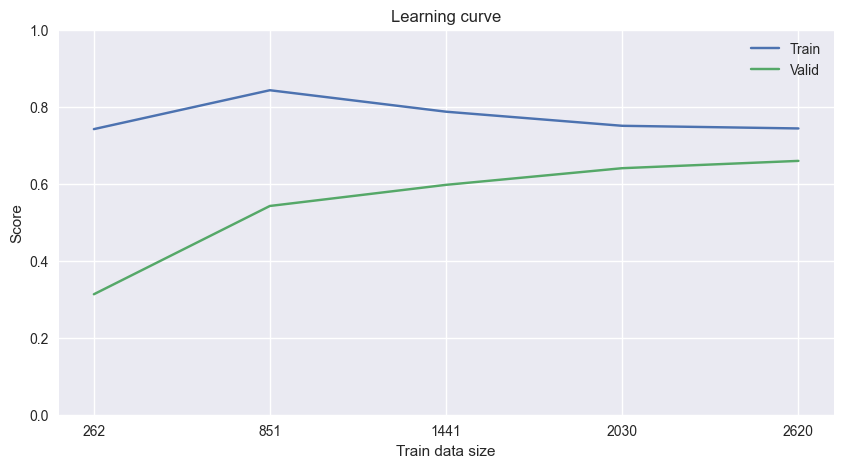

In [54]:
#Визуализируем кривую обучения
fig, ax = plt.subplots(figsize=(10, 5)) #фигура + координатная плоскость
#Строим кривую обучения по метрикам на тренировочных фолдах
ax.plot(train_sizes, train_scores_mean, label='Train')
#Строим кривую обучения по метрикам на валидационных фолдах
ax.plot(train_sizes, valid_scores_mean, label='Valid')
#Даём название графику и подписи осям
ax.set_title('Learning curve')
ax.set_xlabel('Train data size')
ax.set_ylabel('Score')
#Устанавливаем отметки по оси абсцисс
ax.xaxis.set_ticks(train_sizes)
#Устаналиваем диапазон оси ординат
ax.set_ylim(0, 1)
#Отображаем легенду
ax.legend();

++++++++++++++++++++++++++++++++++++++++++++++++++

In [56]:
def plot_learning_curve(model, X, y, cv, scoring="f1", ax=None, title=""):
    # Вычисляем координаты для построения кривой обучения
    train_sizes, train_scores, valid_scores = model_selection.learning_curve(
        estimator=model,  # модель
        X=X,  # матрица наблюдений X
        y=y,  # вектор ответов y
        cv=cv,  # кросс-валидатор
        scoring=scoring,  # метрика
    )
    # Вычисляем среднее значение по фолдам для каждого набора данных
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    # Если координатной плоскости не было передано, создаём новую
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 4))  # фигура + координатная плоскость
    # Строим кривую обучения по метрикам на тренировочных фолдах
    ax.plot(train_sizes, train_scores_mean, label="Train")
    # Строим кривую обучения по метрикам на валидационных фолдах
    ax.plot(train_sizes, valid_scores_mean, label="Valid")
    # Даём название графику и подписи осям
    ax.set_title("Learning curve: {}".format(title))
    ax.set_xlabel("Train data size")
    ax.set_ylabel("Score")
    # Устанавливаем отметки по оси абсцисс
    ax.xaxis.set_ticks(train_sizes)
    # Устанавливаем диапазон оси ординат
    ax.set_ylim(0, 1)
    # Отображаем легенду
    ax.legend()

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [59]:
#Создаём список из моделей
models = [
    linear_model.LogisticRegression(
        max_iter=1000, #количество итераций на сходимость
        random_state=42, #генератор случайных чисел
        class_weight='balanced' #веса классов
    ),
    tree.DecisionTreeClassifier(
        criterion='entropy', #критерий информативности
        max_depth=7, #максимальная глубина
        min_samples_leaf=5, #минимальное число объектов в листе
        random_state=42, #генератор случайных чисел 
        class_weight='balanced' #веса классов
    ),
    tree.DecisionTreeClassifier(
        criterion='entropy', #критерий информативности
        random_state=42, #генератор случайных чисел 
        class_weight='balanced' #веса классов
    ),
]

c:\phython\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\phython\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


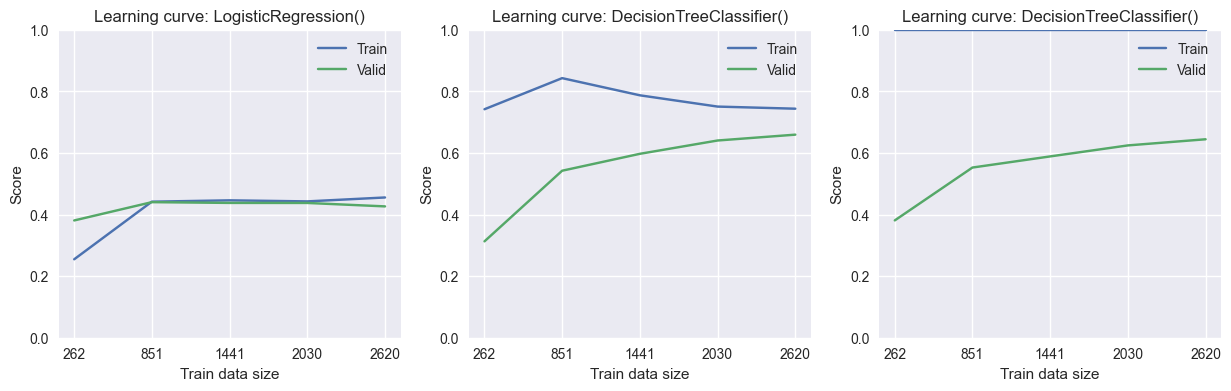

In [67]:
#Создаем объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
#Визуализируем кривые обучения
fig, axes = plt.subplots(1, 3, figsize=(15, 4)) #фигура + 3 координатных плоскости
#Создаем цикл по списку моделей и индексам этого списка
for i, model in enumerate(models): #i-текущий индекс, model - текущая модель
    plot_learning_curve(
        model, X, y, 
        skf, 
        ax=axes[i], 
        title=model.__class__.__name__ + '()'
)